# **<span style="color:red">숭실대 주변 500m이내 정보 수집 및 데이터 확인</span>** # 
***
- 네이버 지도를 기준으로 함
- 직접 네이버 지도의 식당 정보를 엑셀 파일에 옮겨 적음
- 리뷰는 방문자 리뷰 중 키워드 리뷰를 제외한 리뷰만 수집
- 네이버 지도에 메뉴가 기입되어있는 식당만 수집
- 식당 메뉴에 종류가 많을 경우, 여러 메뉴 중 대표적이고 비슷한 가격 3가지를 선별하여 수집함   
  -> 그 식당의 평균 가격 변수를 할당하기 위함임
- 식당의 카테고리는 '한식, 중식, 일식, 양식, 분식, 카페 및 디저트, 그외' 로 7개로 분류함  
  -> 그외에 들어가는 메뉴: 치킨, 마라탕, 과일쥬스전문점, 주점, 베트남음식, 멕시칸음식
- 리뷰를 조사할 때는 "리뷰1::리뷰2::리뷰3" 의 형식으로 각 리뷰 사이에 "::"를 넣어 리뷰를 구분함.


### **데이터 정보 파악하기** ###
***

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np
import requests
from io import BytesIO
from matplotlib import font_manager


raw_df=pd.read_csv("https://raw.githubusercontent.com/rpstss/project-SSUrestaurant/main/%EC%88%AD%EC%8B%A4%EB%8C%80.csv",encoding="cp949") # 식당 raw 데이터 프레임 생성
raw_copy=raw_df.copy() # 혹시 모를 데이터 정보 수정을 위해, raw_df의 복제본 생성

# 식당 데이터 정보 확인
print(raw_copy.info())
print(raw_copy.shape)
print(raw_copy.describe())
raw_copy.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        59 non-null     object 
 1   category    59 non-null     object 
 2   food        43 non-null     object 
 3   review_num  59 non-null     int64  
 4   review      59 non-null     object 
 5   menu-price  59 non-null     object 
 6   star        59 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.4+ KB
None
(59, 7)
        review_num       star
count    59.000000  59.000000
mean    124.644068   4.436441
std     175.948049   0.147131
min       4.000000   4.150000
25%      33.500000   4.340000
50%      89.000000   4.420000
75%     144.500000   4.540000
max    1216.000000   4.780000


,name,category,food,review_num,review,menu-price,star
0,은화수식당 숭실대점,일식,돈가스,69,음.. 맛도 좀 아쉬웠고 위생이 매우 아쉬웠습니다. ::카레 적당히 맵고 맛있어요:...,은화정식:11000::치즈돈가스:9500::고구마매콤이돈가스:10500,4.4


# **<span style="color:red">데이터 분석 및 시각화</span>** # 
***
- 데이터 분석을 위한 전처리 후, 그래프를 작성함
- 추후 streamlit을 이용해 대시보드를 작성할때, 데이터 분석 및 시각화를 기반으로 작성함

### **(1) 카테고리별 식당 수 및 비율 분석** ###

In [2]:
# 카테고리별 식당 수 데이터프레임 num_of_category에 할당
num_of_category=raw_copy.groupby("category",as_index=False)\
                        .agg(n=("category","count"))\
                        .sort_values("n",ascending=False) 
num_of_category

,category,n
6,한식,18
0,그외,13
2,양식,7
3,일식,7
5,"카페,디저트",7
1,분식,5
4,중식,2


In [3]:
# 비율 분석을 위해  ratio 변수 생성
num_of_category=\
    num_of_category\
    .assign(ratio=lambda x: x["n"] / sum(x["n"])*100)\
    .round(1) 
num_of_category

,category,n,ratio
6,한식,18,30.5
0,그외,13,22.0
2,양식,7,11.9
3,일식,7,11.9
5,"카페,디저트",7,11.9
1,분식,5,8.5
4,중식,2,3.4


In [4]:
# 폰트 변경하기 위해 폰트 다운운

# 첫 번째 폰트 파일 다운로드.
font_url1 = "https://github.com/rpstss/project-SSUrestaurant/raw/main/NanumGothic.ttf" # 나눔고딕 ttf입니다.
response1 = requests.get(font_url1)
with open("NanumGothic.ttf", "wb") as f1:
    f1.write(response1.content)

# 두 번째 폰트 파일 다운로드
font_url2 = "https://github.com/rpstss/project-SSUrestaurant/raw/main/Arial%20Unicode%20MS.TTF" # airal unicode ms ttf입니다.
response2 = requests.get(font_url2)
with open("Arial Unicode MS.ttf", "wb") as f2:
    f2.write(response2.content)
    
# 폰트 파일 로드
font_manager.fontManager.addfont("NanumGothic.ttf")
font_manager.fontManager.addfont("Arial Unicode MS.ttf")


<Axes: xlabel='category', ylabel='n'>

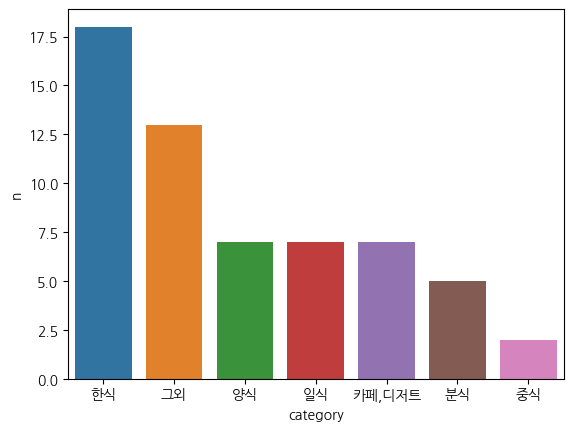

In [5]:
# 카테고리별 식당 수 막대그래프
plt.rcParams['font.family'] = 'NanumGothic' # 한글 변수 이름이 깨짐을 방지하기 위해 font 바꾸기

barplot_num_of_category=\
            sns.barplot(data=num_of_category
                ,x="category"
                ,y="n"
                ,order=num_of_category["category"])
barplot_num_of_category

([<matplotlib.patches.Wedge at 0x18ea9cb4fa0>,
 [Text(0.6897449249809978, 0.9819633081042071, '한식'),
  Text(-1.0338648614200296, 0.6091990219303894, '그외'),
  Text(-1.0338649327166838, -0.6091989009336172, '양식'),
  Text(-0.3175612135199566, -1.0531642206549428, '일식'),
  Text(0.48103797519088204, -0.9892433807836454, '카페,디저트'),
  Text(0.9760872435257633, -0.5072018267181985, '분식'),
  Text(1.0937682719976258, -0.1169229112335462, '중식')],
 [Text(0.4023512062389154, 0.5728119297274541, '30.5%'),
  Text(-0.6030878358283505, 0.3553660961260605, '22.0%'),
  Text(-0.6030878774180655, -0.35536602554460994, '11.9%'),
  Text(-0.17321520737452176, -0.5744532112663323, '11.9%'),
  Text(0.2623843501041175, -0.539587298609261, '11.9%'),
  Text(0.5324112237413253, -0.27665554184629004, '8.5%'),
  Text(0.5966008756350686, -0.0637761334001161, '3.4%')])

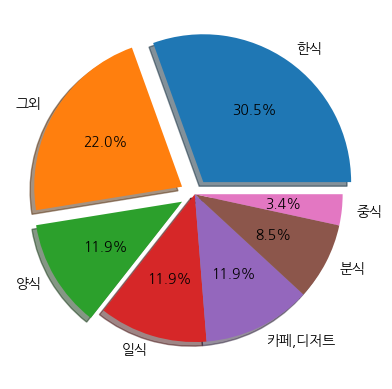

In [6]:
# 카테고리별 식당 비율 파이차트
piechart_ratio_of_category=\
plt.pie(num_of_category["n"]
        ,labels=num_of_category["category"]
        ,autopct='%1.1f%%' # 비율 표시
        ,shadow=True # 그림자 효과 추가
        ,explode=[0.1,0.1,0.1,0,0,0,0]) # 파이 차트가 분리되게 지정
piechart_ratio_of_category

### **(2) 평점 분석** ###
- 전체 식당의 평점 분포
- 카테고리별 평점 분포

<Axes: xlabel='평점', ylabel='Count'>

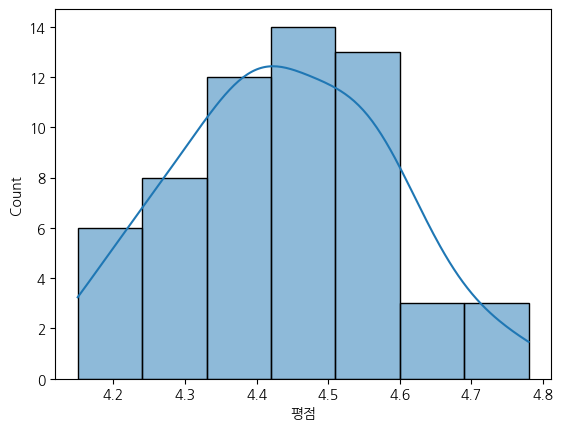

In [7]:
raw_copy=raw_copy.rename(columns={"star":"평점"}) # 변수명 교체
histplot_grade_of_all=sns.histplot(data=raw_copy,x="평점",kde=True) # 전체 식당의 평점 분포 히스토그램
histplot_grade_of_all

<Axes: ylabel='평점'>

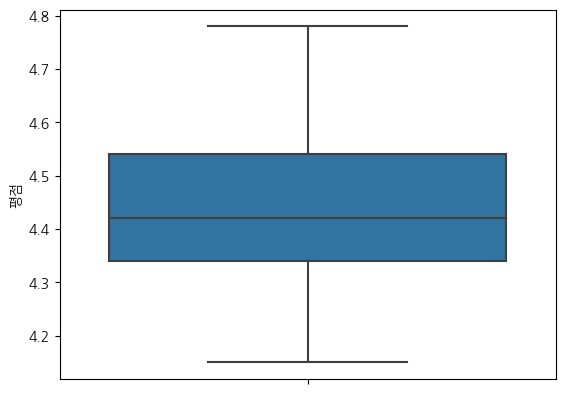

In [8]:
boxplot_grade_of_all=sns.boxplot(data=raw_copy,y="평점") # 전체 식당의 평점 분포 상자그림
boxplot_grade_of_all

<Axes: xlabel='category', ylabel='평점'>

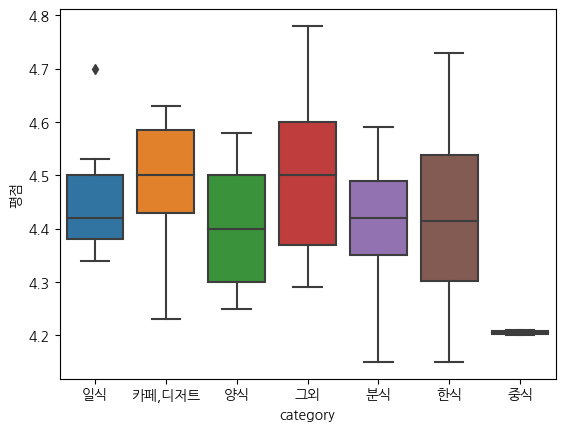

In [9]:
histplot_grade_of_category=sns.boxplot(data=raw_copy,y="평점",x="category") #카테고리별 평점 분포 상자그림
histplot_grade_of_category

### **(3) 상관관계 분석** ####
- 가격과 평점   
- 식당의 평점과 리뷰개수   

In [10]:
raw_copy["menu-price"].head(1)

0    은화정식:11000::치즈돈가스:9500::고구마매콤이돈가스:10500
Name: menu-price, dtype: object

- **raw_copy 데이터에서 메뉴의 가격 열의 행을 봤을 때, "메뉴1이름:메뉴1가격::메뉴2이름:메뉴2가격"의 형식으로 이루어져있음을 알 수 있음  
-> 데이터 분석 및 그래프를 그리기 위해, 메뉴의 평균가격을 구하고자함**

In [11]:
# '평균가격' 열 생성 및 초기화
raw_copy["평균 가격"]=0

# 메뉴의 평균가격 변수 생성
for i in range(len(raw_copy["name"])): # 식당의 개수만큼 반복문 실시
    
    # menu-price 변수를 "::"로 나눈후, 이를 통해 메뉴의 개수와 가격을 추출함
    split_1=str(raw_copy["menu-price"][i]).split("::") # menu-price를 "::"를 기준으로 나눈 문자열을 split_1 변수에 할당
    num_menu=len(split_1) # menu-price에 들어있는 메뉴의 개수를 num_menu 변수에 할당
    split_2=str(":".join(split_1)).split(":") # split_1을 ":"를 기준으로 나눈 리스트를 split_2 변수에 할당
    sum_menu=0 # menu의 가격 합 변수 생성 및 초기화
    for k in range(num_menu): # 메뉴의 개수 만큼 반복문 실행
        d=2*k+1
        sum_menu+=int(split_2[d]) # split_2 변수의 홀수 인덱스마다 가격 정보가 들어있으므로, 이를 sum_menu에 더함
    raw_copy.loc[i, "평균 가격"] = sum_menu / num_menu # '평균 가격' 변수에 메뉴들의 평균 가격을 할당함

raw_copy["평균 가격"]=raw_copy["평균 가격"].round(1)

raw_copy["평균 가격"] # '평균 가격' 열이 잘 만들어졌는지 확인

0     10333.3
1      1700.0
2      2700.0
3      5833.3
4     18666.7
5     19666.7
6      7500.0
7      5233.3
8      8900.0
9     18000.0
10     2466.7
11     1500.0
12     6000.0
13    23000.0
14     6500.0
15     7200.0
16     4500.0
17    13833.3
18     5000.0
19    19500.0
20     6333.3
21     8000.0
22     5800.0
23     4400.0
24     8500.0
25     9066.7
26     5000.0
27     9000.0
28    12000.0
29    11000.0
30    10900.0
31     3500.0
32     5500.0
33    13000.0
34    11000.0
35     5200.0
36     8000.0
37     7500.0
38     8200.0
39    18000.0
40     7333.3
41     6000.0
42     8000.0
43     8000.0
44     5500.0
45    28400.0
46    12900.0
47    13566.7
48    13500.0
49     3400.0
50     6666.7
51     3000.0
52    15000.0
53     7333.3
54     6650.0
55     4933.3
56     9833.3
57    12900.0
58     8000.0
Name: 평균 가격, dtype: float64

          평균 가격        평점     리뷰 개수
평균 가격  1.000000  0.053250 -0.144387
평점     0.053250  1.000000  0.015981
리뷰 개수 -0.144387  0.015981  1.000000


<Axes: >

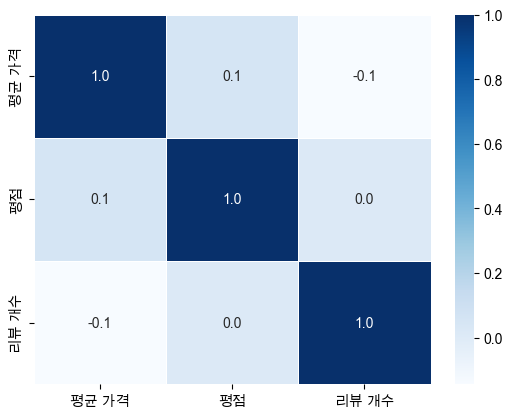

In [12]:
# 전체 식당의 가격, 평점, 리뷰 개수 사이의 상관관계 히트맵
plt.rcParams['font.family'] = 'Arial Unicode MS' # 맑은 고딕 폰트에서는 '-'가 없어서 오류가남. 폰트 변경

raw_copy=raw_copy.rename(columns={"review_num":"리뷰 개수"}) # review_num 변수의 이름을 '리뷰 개수'로 변경

print(raw_copy[["평균 가격","평점","리뷰 개수"]].corr()) # 상관관계 표 출력
heatmap_all=sns.heatmap(data = raw_copy[["평균 가격","평점","리뷰 개수"]].corr(),
                        annot=True, # 각 셀에 숫자값 표시
                        fmt = '.1f', linewidths=.5, cmap='Blues')
heatmap_all

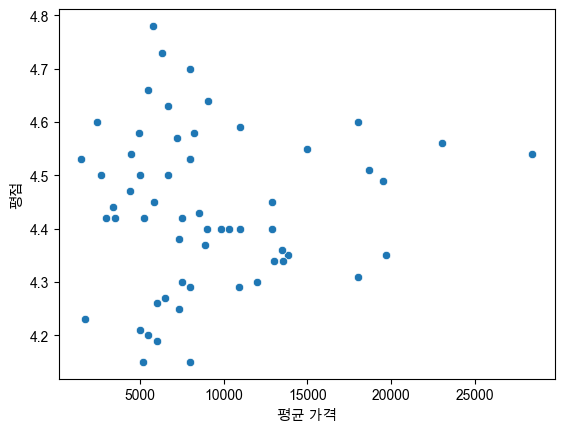

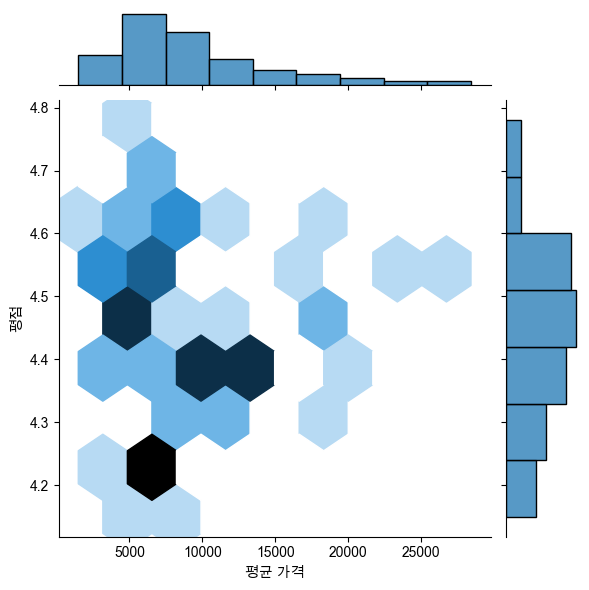

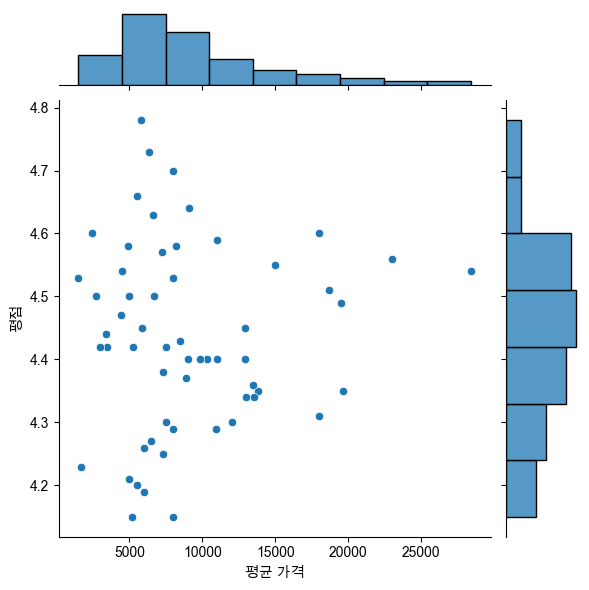

In [13]:
# 전체 식당의 평점과 가격 관계 산점도 그래프
scatterplot_corr_of_all=sns.scatterplot(data=raw_copy,x="평균 가격",y="평점")
sns.jointplot(x=raw_copy['평균 가격'], y=raw_copy['평점'], kind = 'hex') # hex는 육각형 빈도 그래프
sns.jointplot(x=raw_copy['평균 가격'], y=raw_copy['평점'], kind = 'scatter') # jointplot으로 표현

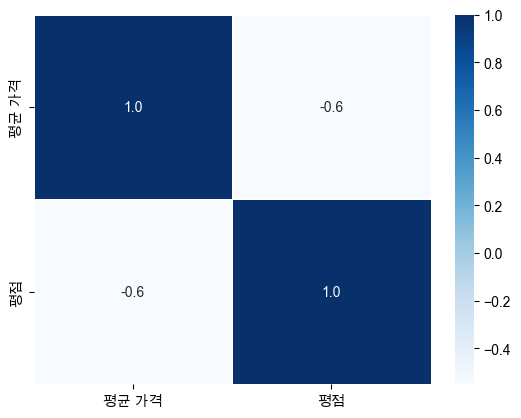

In [14]:
# 카테고리별 가격과 평점 관계 분석

# 카테고리별 가격과 평점 상관관계 히트맵 함수
def corr_heatmap(x="일식"):
    df=raw_copy.query('category=="%s"'%x)
    sns.heatmap(data = df[["평균 가격","평점"]].corr(), annot=True, fmt = '.1f', linewidths=.5, cmap='Blues')



    
# 함수 예시
corr_heatmap("일식")

### **(4) 가격대 분석** ###
- 가격대의 분포


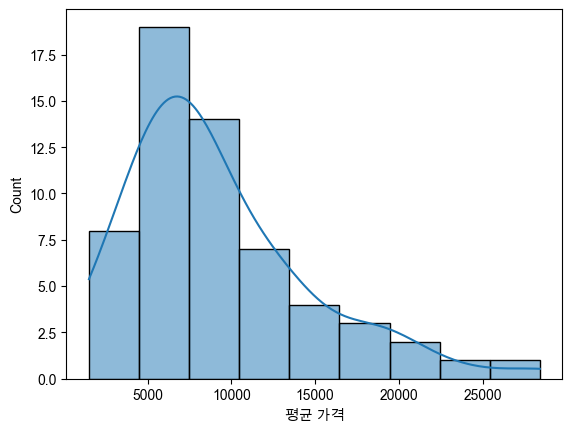

In [15]:
histplot_price_of_all=sns.histplot(data=raw_copy,x="평균 가격",kde=True) # 전체 식당의 메뉴 평균 가격 분포 히스토그램

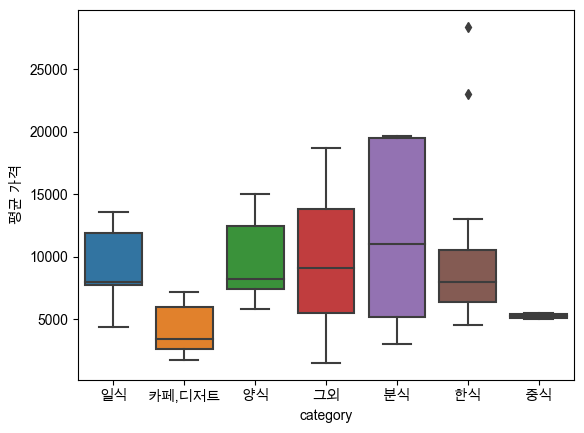

In [16]:
#카테고리별 메뉴 평균 가격 분포 상자그림
histplot_price_of_category=sns.boxplot(data=raw_copy,y="평균 가격",x="category")

### **(5) 리뷰 분석** ###
- 워드 클라우드  
- 리뷰의 수가 30개가 많이 넘는 식당은, 리뷰의 개수를 최신순으로 30개까지만 분석하는데 쓰도록 함   
  -> 한 식당의 리뷰만 매우 많을 경우, 숭실대 주변 식당 특징의 대표성을 띠지 못하는 워드 클라우드가 나올 수 있음

In [17]:
raw_copy["review"].head(3) # "review" 열 데이터 확인

0    음.. 맛도 좀 아쉬웠고 위생이 매우 아쉬웠습니다. ::카레 적당히 맵고 맛있어요:...
1    아아가 조금 밍밍해짐. 예전에는 원두 맛이 강했는데 요즘은 밍밍해요::사람 많은데 ...
2    학교앞 자주가는곳 돟아용::굿::가성비::가격 착하고 맛 괜차나요::굿::커피온리 ...
Name: review, dtype: object

- **raw_copy 데이터에서 review 열의 행을 봤을 때, "리뷰1::리뷰2::리뷰3"의 형식으로 이루어져있음을 알 수 있음  
-> split(::)함수로 리뷰를 각각 나누고 내가 조사한 리뷰의 개수가 30개가 넘을 경우, 30개만 남게 하고자 함**

In [18]:
import numpy as np
# 리뷰 열 생성 및 초기화
raw_copy["리뷰"] = np.nan

review_split=0 # review_split 변수 생성

for i in range(len(raw_copy["name"])): # 식당의 개수 만큼 반복문 실시
    if pd.isnull(raw_copy["review"][i]): # 리뷰가 없을 경우 '리뷰' 변수에 NaN을 대입하고, 다음 반복문 실시
        raw_copy.loc[i, "리뷰"] = np.nan
        continue
        
    # review 변수를 "::"로 나눈후 review_split 변수에 할당
    review_split=str(raw_copy["review"][i]).split("::") 
    
    if len(review_split) > 30:
        raw_copy.loc[i, "리뷰"] = "::".join(review_split[:30]) # 리뷰 개수가 30개를 넘을 경우, 30개까지만 "리뷰" 변수에 할당
    else:
        raw_copy.loc[i, "리뷰"] = "::".join(review_split)
        


raw_copy["리뷰"] # 리뷰 열이 잘 만들어졌는지 확인

0     음.. 맛도 좀 아쉬웠고 위생이 매우 아쉬웠습니다. ::카레 적당히 맵고 맛있어요:...
1     아아가 조금 밍밍해짐. 예전에는 원두 맛이 강했는데 요즘은 밍밍해요::사람 많은데 ...
2     학교앞 자주가는곳 돟아용::굿::가성비::가격 착하고 맛 괜차나요::굿::커피온리 ...
3     맛있는 맥그리들 먹었어요 단짠 매력있네요::친절하세요~::맥모닝 하루시작::주말 아...
4     굿::굿::조아요::좋아요::치킨 맛있었어요~^^::뿌링클 맛나요::좋아요::치킨도...
5     떡볶이가 맛있어요::떡볶이 맛있어요 :)::가격이 비싼데 맛있어요::떡볶이 맛있지만...
6     좋아요::굿굿::맛있어요::좋아요::좋아요::좋아요::굿::굿::따봉!!!!::굿:...
7     다양한 메뉴 맛있어요~^^::집 앞에 있어서 일단 너무너무 행복하고... 자주 먹는...
8     맛있어요::마라탕 너무 맛있었어요! 재료도 넘 신선해서 좋았습니당::마라 맛이 다른...
9                                      굿::굿::맛있어요::굿::굿
10    ??::굿::커피 맛있음::가볍게 테이크아웃해서 커피 한잔하기 좋습니다 :)::맛있...
11    초바초코칩 젤 맛있어영::음료 맛있어요::굿::굿::굿::키오스크 두 대 있어서 주...
12    역시 학교앞 식당. 가성비 끝판왕! 양도 많고 가격도 착합니다.::굿::굿::굿::...
13    직원분 핸드폰 너무 많이 봐서\n음료 주문한 것도 안주시네요..ㅎ::굿::로제 찜닭...
14    15년만에 갔어요\n근처 갈일이 생겨서 검색해보니 여전히 장사하시더라구요!\n여기 ...
15    금요일 점심시간대에 가니 사람 별로 없어서 좋았어요~ 흑임자 마들렌, 까눌레도 특이...
16    ????::양이 너무 많아요ㅠㅠ 맛있어요♡♡::감사합니다::지지고  10년전부터 노...
17    조아요::좋아요::굿::좋아요::이링ㅇ에ㅔㅔㅣㅣㅣㅣㅣㅐㅐ::굿::좋아요::굿

In [19]:
# 식당 전체 워드 클라우드

# 불필요한 문자 제거하기
raw_copy["리뷰"]=raw_copy["리뷰"].str.replace('[^가-힣]',' ',regex=True) #regex=True 는 정규표현식 적용

# 명사 추출하기
import konlpy # 한국어 자연어 처리 패키지
kkma=konlpy.tag.Kkma()  # 형태소 분석기 객세 생성

nouns = raw_copy["리뷰"].astype(str).apply(kkma.nouns)
nouns

0     [음, 맛, 위생, 레, 굿, 돈까스, 함, 함박스테끼, 박스, 테, 끼, 최, 최...
1     [아가, 예전, 원두, 맛, 요즘, 사람, 커피, 여기, 학교, 앞, 커피집, 집,...
2     [학교, 학교앞, 앞, 곳, 돟, 용, 굿, 성비, 가격, 맛, 괜차나, 커피, 리...
3     [맥, 맥그리들, 그리들, 매력, 친절, 친절하세, 하세, 맥모닝, 모닝, 하루, ...
4     [굿, 조아, 치킨, 뿌링, 맛, 나, 직원, 친절, 매장, 스크린, 축구, 축구경...
5     [떡볶이, 가격, 비, 비싸요, 싸요, 떡볶이예, 예, 배달, 순대, 튀김, 굿, ...
6     [굿, 굿굿, 봉, 물, 맛, 라자, 만, 사이다, 탄산수, 탄산수맛, 비추, 비추...
7     [다양, 메뉴, 집, 앞, 행복, 세여, 애플, 애플시나몬, 시나몬, 맛, 맛있엉,...
8     [마라, 마라탕, 탕, 재료, 신선, 맛, 곳, 강, 편, 굿, 음식, 우, 성비,...
9                                                   [굿]
10    [굿, 커피, 맛, 맛있음, 있음, 테이크, 테이크아웃, 아웃, 한잔, 여자, 여자...
11    [초, 초바, 바, 코, 코칩, 칩, 영, 음료, 굿, 키, 키오스, 오스, 두, ...
12    [학교, 학교앞, 앞, 식당, 성비, 끝판, 끝판왕, 왕, 양도, 가격, 굿, 김치...
13    [직원, 직원분, 분, 핸드폰, 음료, 주문, 안주, 굿, 로제, 찜, 찜닭, 닭,...
14    [년, 년만, 만, 근처, 일, 검색, 장사, 즉석, 즉석떡볶이, 떡볶이, 무, 년...
15    [금요일, 점심, 점심시간대, 시간대, 사람, 흑임자, 마들렌, 레, 특이, 굿, ...
16    [양, 감사, 지지, 년, 년전, 전, 노량진, 숭, 숭실대, 실, 대, 함, 볶음...
17    [조아, 굿, 링, 모, 맛, 맛있음, 있음, 여기, 너겟, 맛나용, 나용,

In [20]:
# 한 행에 한 단어가 들어가도록 구성
nouns=nouns.explode()
nouns

0      음
0      맛
0     위생
0      레
0      굿
      ..
58    친구
58    쑥갓
58    양이
58    날씨
58    제격
Name: 리뷰, Length: 4573, dtype: object

In [21]:
df_word=pd.DataFrame({'word':nouns})

df_word["count"]=df_word["word"].str.len() # 문자열 길이 추가

df_word=df_word.query("count>=2") # 문자열 길이가 두글자 이상 단어만 남기기

df_word

,word,count
0,위생,2
0,돈까스,3
0,함박스테끼,5
0,박스,2
0,최공,2
...,...,...
58,친구,2
58,쑥갓,2
58,양이,2
58,날씨,2


In [22]:
# 빈도표 만들기
df_word=df_word.groupby("word",as_index=False)\
                .agg(n=("word","count"))\
                .sort_values("n",ascending=False)

df_word.loc[df_word["word"] == "성비", "word"] = "가성비"# '가성비'라는 단어를 '성비'로 인식해서 직접 바꿔줌
df_word

,word,n
1488,친절,38
835,가성비,36
3,가격,32
782,사장님,30
1159,음식,25
...,...,...
657,뱃살부위,1
656,뱃살,1
655,백만년,1
654,백만,1


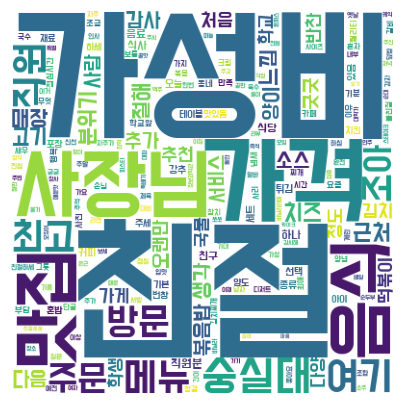

In [23]:
import requests
from PIL import ImageFont

font_url = "https://github.com/rpstss/project-SSUrestaurant/raw/main/DoHyeon-Regular.ttf"  # 폰트 파일의 URL
font_path = "font.ttf"  # 다운로드 받을 폰트 파일의 경로와 이름

# 폰트 파일 다운로드
response = requests.get(font_url)
with open(font_path, "wb") as f:
    f.write(response.content)
font_size=12
# 워드클라우드 생성 시 폰트로 사용
font = ImageFont.truetype(font_path, font_size)


font='DoHyeon-Regular.ttf'
dic_word=df_word.set_index("word").to_dict()["n"] # 데이터 프레임을 딕셔너리로 변환
dic_word["가성비"] = 36
from wordcloud import WordCloud
wc=WordCloud(random_state=1234, # 난수 고정
             font_path=font, # 폰트 설정
             width=400, #가로 크기
             height=400, # 세로 크기
             background_color="white") # 배경색

# 워드 클라우드 만들기
img_wordcloud=wc.generate_from_frequencies(dic_word)

#워드 클라우드 출력하기
plt.figure(figsize=(5,5)) # 가로 세로 크기 설정
plt.axis("off") # 테두리 선 없애기
plt.imshow(img_wordcloud) # 워드 클라우드 출력

<Axes: xlabel='n', ylabel='word'>

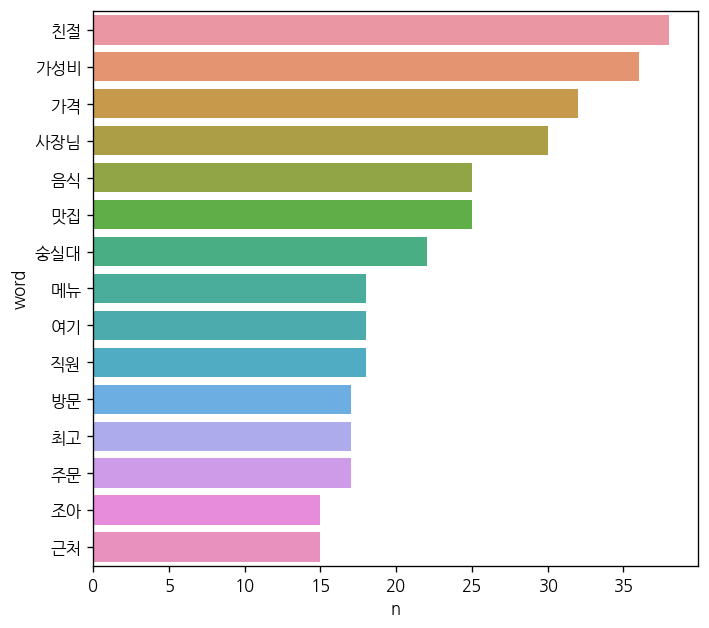

In [24]:
# 단어 빈도 막대 그래프 만들기
top15=df_word.head(15)

import seaborn as sns

plt.rcParams.update({"font.family":"NanumGothic",
                     "figure.dpi":120, # 해상도
                     "figure.figsize": [6.5,6]})

sns.barplot(data=top15,x="n",y="word")

### **(6) 식당 추천** ###
-가중치 사용  
-사용자에게 가중치를 각각 어떻게 할당할지 물어봄  
-식당 추천 분석에 쓰이는 변수는 평균가격과 평점으로 함  
-각 카테고리별로 추천 가게를 알려줌

In [25]:
print("식당을 추천해드리겠습니다. 평점과 평균 가격을 각각 몇 대 몇으로 중요하게 생각하는지 알려주세요.")
print("(ex. 평점과 가격을 4:6의 정도로 중요하게 생각한다면 4,6으로 입력해주세요.)")
a,b=map(int,input("a,b의 형식으로 입력해주세요").split())# a는 평점 변수의 가중치, b는 평균 가격의 가중치임

# 평점과 평균가격 변수를 Min-Max 정규화를 하기 위해 사이킷런 모듈 사용
from sklearn.preprocessing import MinMaxScaler


# Min-Max 스케일링 객체 생성
scaler = MinMaxScaler()



# 한식이라고 하자
reco = raw_copy.copy()
reco = reco.query("category=='한식'")

reco = reco.drop(["리뷰 개수", "리뷰", "menu-price", "review"], axis=1)

# MinMaxScaler은 2차원 배열을 기준으로 하므로, 열의 형태를 2차원으로 변경
ratings = reco["평점"].values.reshape(-1, 1) 
prices = reco["평균 가격"].values.reshape(-1, 1)

# 변경된 열을 MinMaxScaler에 적용
reco["평점min_max"] = scaler.fit_transform(ratings)
reco["가격min_max"] = scaler.fit_transform(prices)

# 가중치 합 열 생성
reco["Weight"]=reco["평점min_max"]*a + (1-reco["가격min_max"])*b
reco=reco[["name","Weight","평점","평균 가격"]].sort_values("Weight",ascending=False).head()
reco


식당을 추천해드리겠습니다. 평점과 평균 가격을 각각 몇 대 몇으로 중요하게 생각하는지 알려주세요.
(ex. 평점과 가격을 4:6의 정도로 중요하게 생각한다면 4,6으로 입력해주세요.)


a,b의 형식으로 입력해주세요 5 5


,name,Weight,평점,평균 가격
20,청운음식점,9.616464,4.73,6333.3
55,아리랑컵밥 숭실대점,8.616248,4.58,4933.3
16,지지고 숭실대점,8.362069,4.54,4500.0
50,파라다이스,7.563957,4.50,6666.7
43,찌개대학부대과,7.543644,4.53,8000.0


<Axes: xlabel='Weight', ylabel='name'>

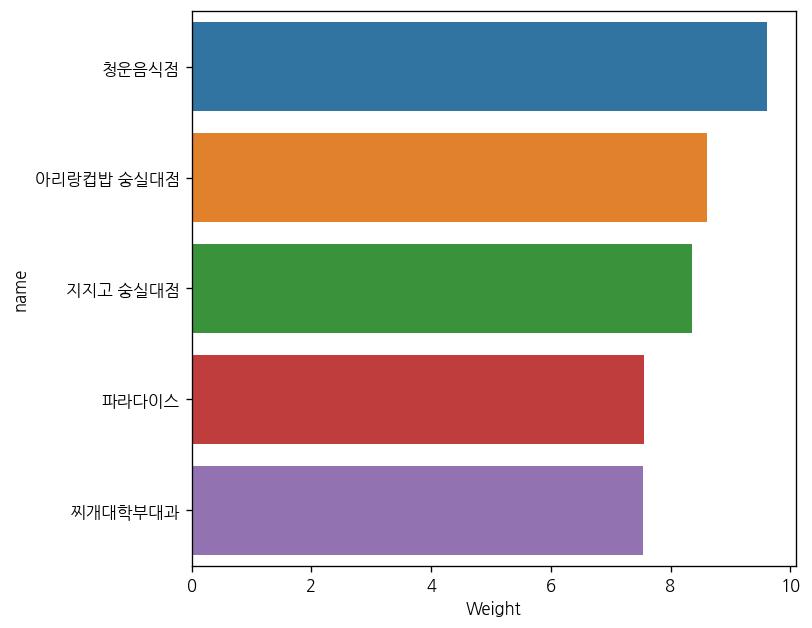

In [26]:
sns.barplot(data=reco,y="name",x="Weight")

# **<span style="color:red">streamlit으로 대시보드 작성</span>** # 
***
- 위에서 진행한 데이터 분석 및 시각화를 기반으로 대시보드를 작성함
- 파이썬에서 제공하는 streamlit 모듈을 이용함   
- ssuproject.py 파일로 만듬
- 코드 길이가 길어서 굳이 여기에 안넣음. ssuproject.py 파일에서 확인 바람